In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.api import OLS, add_constant
from sklearn.feature_selection import RFE

df=pd.read_csv('./StudentPerformanceFactors.csv')

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Data Clear & Encode

In [60]:
df.drop_duplicates(inplace=True) # remove the duplicate records

for column in df.select_dtypes(include=['object']).columns:

    unique_values = df[column].unique()

    mapping = {value: i for i, value in enumerate(unique_values)}

    df[column] = df[column].map(mapping)

df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0,0,0,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1,0,2,4,0,1,0,1,70
5,19,88,1,1,1,8,89,1,0,3,1,0,0,0,3,0,2,0,0,71
6,29,84,1,2,1,7,68,0,0,1,0,0,1,2,2,0,0,1,0,67
7,25,78,0,0,1,6,50,1,0,1,2,1,0,1,2,0,0,2,0,66
8,17,94,1,0,0,6,80,2,0,0,1,2,1,2,1,0,1,0,0,69
9,23,98,1,1,1,8,71,1,0,0,2,1,0,0,5,0,0,1,0,72


### Encode

### 

In [61]:
# Feature selection
X = df.drop('Exam_Score', axis=1)  # Features
y = df['Exam_Score']                 # Target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Stepwise Regression

In [62]:
import numpy as np
import pandas as pd
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def backward_elimination(X, y):
    X_with_const = add_constant(X)
    model = OLS(y, X_with_const).fit()
    
    # Debugging: Print initial p-values
    print("Initial p-values:")
    print(model.pvalues)

    while True:
        p_values = model.pvalues.iloc[1:]  # Exclude constant term
        max_p_value = p_values.max()
        
        # Debugging: Print maximum p-value and corresponding feature
        print(f"Max p-value: {max_p_value:.4f}")
        if max_p_value > 0.05:  # Significance level threshold
            excluded_feature = p_values.idxmax()
            print(f"Dropping feature: {excluded_feature} with p-value: {max_p_value:.4f}")
            X = X.drop(columns=[excluded_feature])
            model = OLS(y, add_constant(X)).fit()
        else:
            break
            
    return model, X.columns  # Return both model and selected feature names

# Fit the model
final_model, selected_features = backward_elimination(X_train, y_train)

# Print the model summary
print(final_model.summary())

# Model evaluation
def evaluate_model(model, X_test, y_test, selected_features):
    # Filter the test set to only include selected features
    X_test_filtered = X_test[selected_features]
    X_test_with_const = add_constant(X_test_filtered)
    
    # Predictions
    predictions = model.predict(X_test_with_const)

    # Evaluation metrics
    r_squared = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print("\nModel Evaluation Metrics:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Call the evaluation function with your test data
evaluate_model(final_model, X_test, y_test, selected_features)


Initial p-values:
const                          0.000000e+00
Hours_Studied                  0.000000e+00
Attendance                     0.000000e+00
Parental_Involvement          2.252884e-121
Access_to_Resources           1.045109e-123
Extracurricular_Activities     3.309220e-22
Sleep_Hours                    5.428518e-01
Previous_Scores               5.852143e-120
Motivation_Level               2.261610e-33
Internet_Access                1.221407e-17
Tutoring_Sessions              1.112693e-95
Family_Income                  3.494113e-42
Teacher_Quality                5.548306e-01
School_Type                    9.769793e-01
Peer_Influence                 8.338584e-14
Physical_Activity              2.505874e-10
Learning_Disabilities          1.156969e-20
Parental_Education_Level       1.884156e-31
Distance_from_Home             1.656248e-24
Gender                         7.878864e-01
dtype: float64
Max p-value: 0.9770
Dropping feature: School_Type with p-value: 0.9770
Max p-value: 0.7

### Regularization Techniques

In [65]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit Lasso Regression
def fit_lasso(X_train, y_train, alpha=1.0):
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    return lasso_model

# Evaluate Lasso Model
def evaluate_lasso_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r_squared = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print("\nLasso Model Evaluation Metrics:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Lasso MAE: {mae:.4f}")
    print(f"Lasso MSE: {mse:.4f}")
    print(f"Lasso RMSE: {rmse:.4f}")

# Fit and evaluate Lasso model
lasso_model = fit_lasso(X_train[selected_features], y_train, alpha=1.0)
evaluate_lasso_model(lasso_model, X_test[selected_features], y_test)


Lasso Model Evaluation Metrics:
R-squared: 0.6179
Lasso MAE: 1.3746
Lasso MSE: 5.4006
Lasso RMSE: 2.3239


In [66]:
from sklearn.linear_model import Ridge

# Fit Ridge Regression
def fit_ridge(X_train, y_train, alpha=1.0):
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    return ridge_model

# Evaluate Ridge Model
def evaluate_ridge_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    r_squared = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    print("\nRidge Model Evaluation Metrics:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"Ridge MAE: {mae:.4f}")
    print(f"Ridge MSE: {mse:.4f}")
    print(f"Ridge RMSE: {rmse:.4f}")

# Fit and evaluate Ridge model
ridge_model = fit_ridge(X_train[selected_features], y_train, alpha=1.0)
evaluate_ridge_model(ridge_model, X_test[selected_features], y_test)


Ridge Model Evaluation Metrics:
R-squared: 0.7570
Ridge MAE: 0.5911
Ridge MSE: 3.4347
Ridge RMSE: 1.8533


# Curve Fitting

### Polynomial fitting

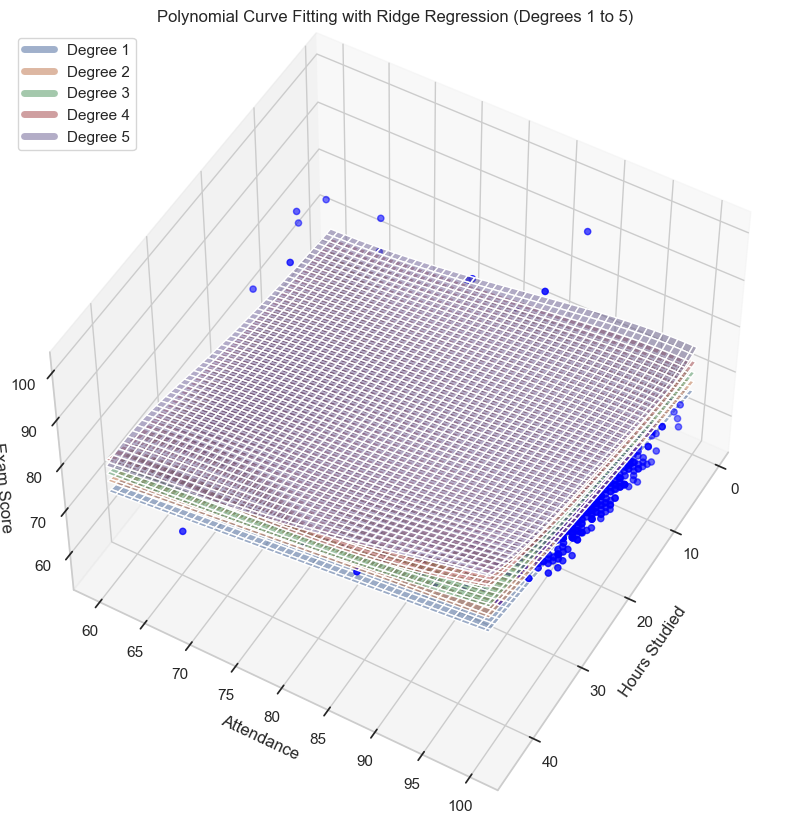

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
data = pd.read_csv('./StudentPerformanceFactors.csv')
df = pd.DataFrame(data)

df.drop_duplicates(inplace=True)  # Remove duplicate records

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

# Define features and target variable
X = df[['Hours_Studied', 'Attendance']].values
y = df['Exam_Score'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generate a grid for plotting the surface of the polynomial fits
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), num=100)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), num=100)
x1_grid, x2_grid = np.meshgrid(x_range, y_range)
X_grid_scaled = scaler.transform(np.column_stack((x1_grid.ravel(), x2_grid.ravel())))

# Prepare the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')

# Create custom legend handles
legend_handles = []

# Fit and plot polynomial models from degree 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train_scaled)

    # Use Ridge regression with cross-validation to find optimal alpha
    ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
    ridge_model.fit(X_poly_train, y_train)

    # Transform the grid for predictions
    X_grid_poly = poly.transform(X_grid_scaled)
    
    # Predict using the fitted model for the grid points
    y_fit = ridge_model.predict(X_grid_poly)

    # Reshape predictions for plotting
    y_fit_grid = y_fit.reshape(x1_grid.shape)

    # Offset each surface slightly along the z-axis to distinguish them better
    offset = degree * 2  # Adjust this value as needed for visibility

    # Plotting each polynomial surface with a different color and label
    surface = ax.plot_surface(x1_grid, x2_grid, y_fit_grid + offset, alpha=0.5)

    # Create a custom legend handle for this degree
    legend_handles.append(Line2D([0], [0], color=surface._facecolor3d[0], lw=5, label=f'Degree {degree}'))

# Setting labels and title
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Exam Score')
ax.set_title('Polynomial Curve Fitting with Ridge Regression (Degrees 1 to 5)')

# Add custom legend handles to the plot
ax.legend(handles=legend_handles, loc='upper left')

# Optionally adjust viewing angle for better visibility
ax.view_init(elev=50., azim=30)  # Adjust elevation and azimuth as needed

plt.show()

Mean Squared Error (MSE): 5.61
Root Mean Squared Error (RMSE): 2.37
Mean Absolute Error (MAE): 1.48
R-squared (R²): 0.61
Adjusted R-squared: 0.61

Cross-Validation Results:
Alpha: 0.000001, Cross-Validated Score: 4.6154
Alpha: 0.000010, Cross-Validated Score: 0.5512
Alpha: 0.000100, Cross-Validated Score: 4.5303
Alpha: 0.001000, Cross-Validated Score: 6.9093
Alpha: 0.010000, Cross-Validated Score: 0.4583
Alpha: 0.100000, Cross-Validated Score: 15.9220
Alpha: 1.000000, Cross-Validated Score: 0.0682
Alpha: 10.000000, Cross-Validated Score: 1.9528
Alpha: 100.000000, Cross-Validated Score: 2.8554
Alpha: 1000.000000, Cross-Validated Score: 1.0603
Alpha: 10000.000000, Cross-Validated Score: 15.8861
Alpha: 100000.000000, Cross-Validated Score: 4.6125
Alpha: 1000000.000000, Cross-Validated Score: 2.6558


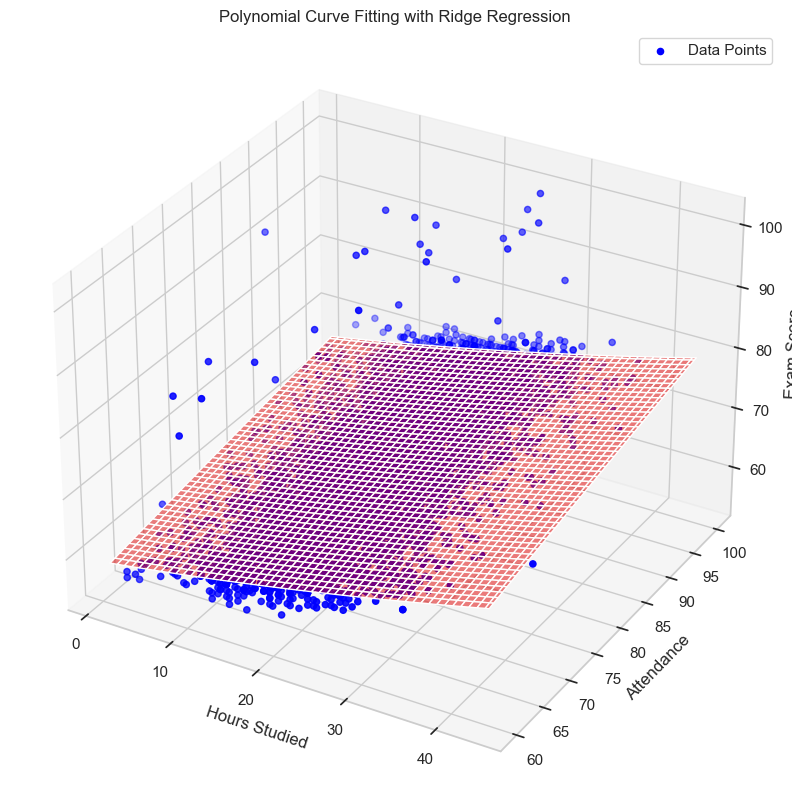

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
data = pd.read_csv('./StudentPerformanceFactors.csv')
df = pd.DataFrame(data)

df.drop_duplicates(inplace=True)  # Remove duplicate records

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

# Define features and target variable
X = df[['Hours_Studied', 'Attendance']].values
y = df['Exam_Score'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a polynomial model (degree can be adjusted)
degree = 2  # Start with a lower degree
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train_scaled)

# Use Ridge regression with cross-validation to find optimal alpha
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13), store_cv_values=True)
ridge_model.fit(X_poly_train, y_train)

# Generate predictions on test set
X_poly_test = poly.transform(X_test_scaled)
y_pred = ridge_model.predict(X_poly_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]  # number of observations in test set
p = X_poly_test.shape[1] - 1  # number of features (including bias term)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

# Output cross-validation results
print("\nCross-Validation Results:")
for i, alpha in enumerate(ridge_model.alphas):
    print(f"Alpha: {alpha:.6f}, Cross-Validated Score: {ridge_model.cv_values_[i].mean():.4f}")

# Plotting results (optional)
x_range = np.linspace(X[:,0].min(), X[:,0].max(), num=100)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), num=100)
x1_grid , x2_grid = np.meshgrid(x_range , y_range)
X_grid_scaled = scaler.transform(np.column_stack((x1_grid.ravel(), x2_grid.ravel())))
X_grid_poly = poly.transform(X_grid_scaled)

y_fit = ridge_model.predict(X_grid_poly)
y_fit_grid = y_fit.reshape(x1_grid.shape)

fig = plt.figure(figsize=(12 ,10))
ax = fig.add_subplot(111 , projection='3d')
ax.scatter(X[:,0], X[:,1], y , color='blue', label='Data Points')
ax.plot_surface(x1_grid , x2_grid , y_fit_grid , color='red', alpha=0.5)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Exam Score')
ax.set_title('Polynomial Curve Fitting with Ridge Regression')
plt.legend()
plt.show()

# PCA

Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Explained Variance Ratio: [0.09613782 0.05640309]
Class distribution in training set before SMOTE:
Gender
0    2964
1    2138
Name: count, dtype: int64
Class distribution in training set after SMOTE:
Gender
0    2964
1    2964
Name: count, dtype: int64
Best Model Parameters: {'C': 1, 'solver': '

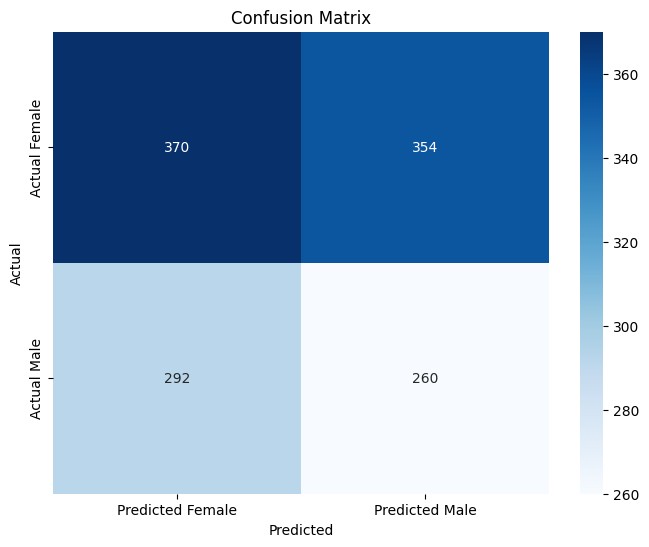

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
data = pd.read_csv('./StudentPerformanceFactors.csv')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)

# Encode categorical variables
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Separate features and target variable
X = data.drop(columns=['Gender'])  # Features
y = data['Gender']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Choose number of components based on explained variance or other criteria
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check the distribution of classes in the training set
print("Class distribution in training set before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of classes after SMOTE
print("Class distribution in training set after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize and train the Logistic Regression model with resampled data
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
clf = GridSearchCV(logreg, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
clf.fit(X_train_resampled, y_train_resampled)
best_model = clf.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
print("Best Model Parameters:", clf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Class distribution in training set before SMOTE:
Gender
0    2964
1    2138
Name: count, dtype: int64
Class distribution in training set after SMOTE:
Gender
0    2964
1    2964
Name: count, dtype: int64
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.5

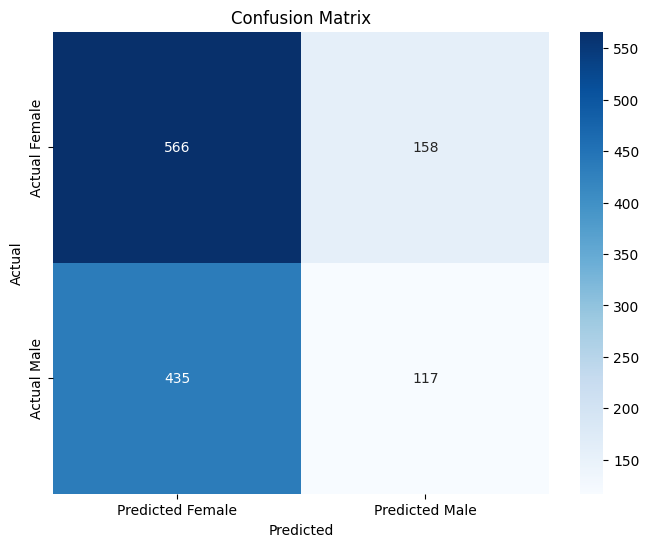

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv('./StudentPerformanceFactors.csv')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)  # Consider imputation instead of dropping if necessary

# Encode categorical variables
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

# Separate features and target variable
X = data.drop(columns=['Gender'])  # Features
y = data['Gender']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the distribution of classes in the training set
print("Class distribution in training set before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of classes after SMOTE
print("Class distribution in training set after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize Random Forest Classifier with Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found by Grid Search
print("Best parameters:", grid_search.best_params_)

# Make predictions with the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the new model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Female', 'Predicted Male'],
            yticklabels=['Actual Female', 'Actual Male'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Analysis & Visualization

### heatmap - Correlation Matrix

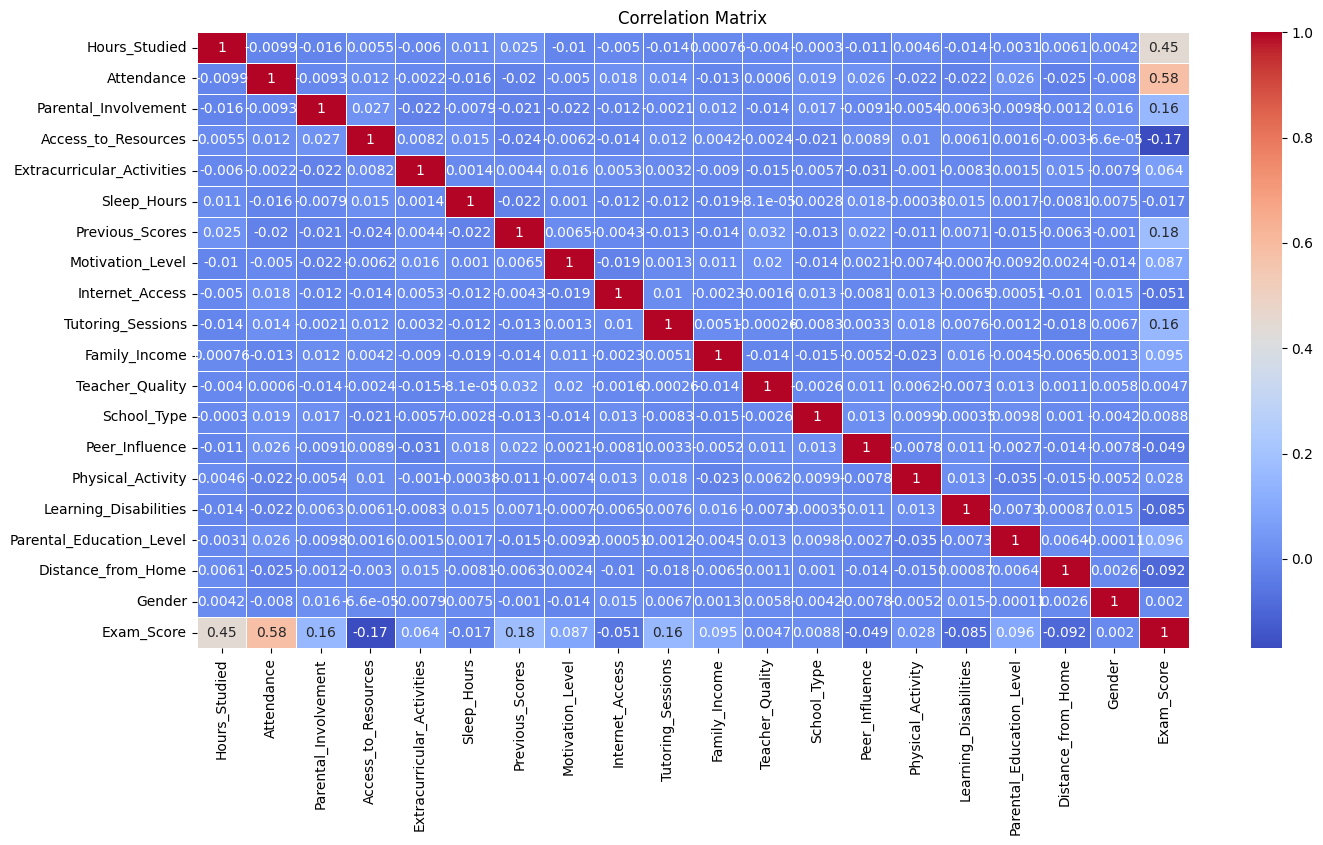

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Heatmap showing correlations between numerical features in the dataset
plt.figure(figsize=(16, 8))

correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')

plt.show()

### Regression Line

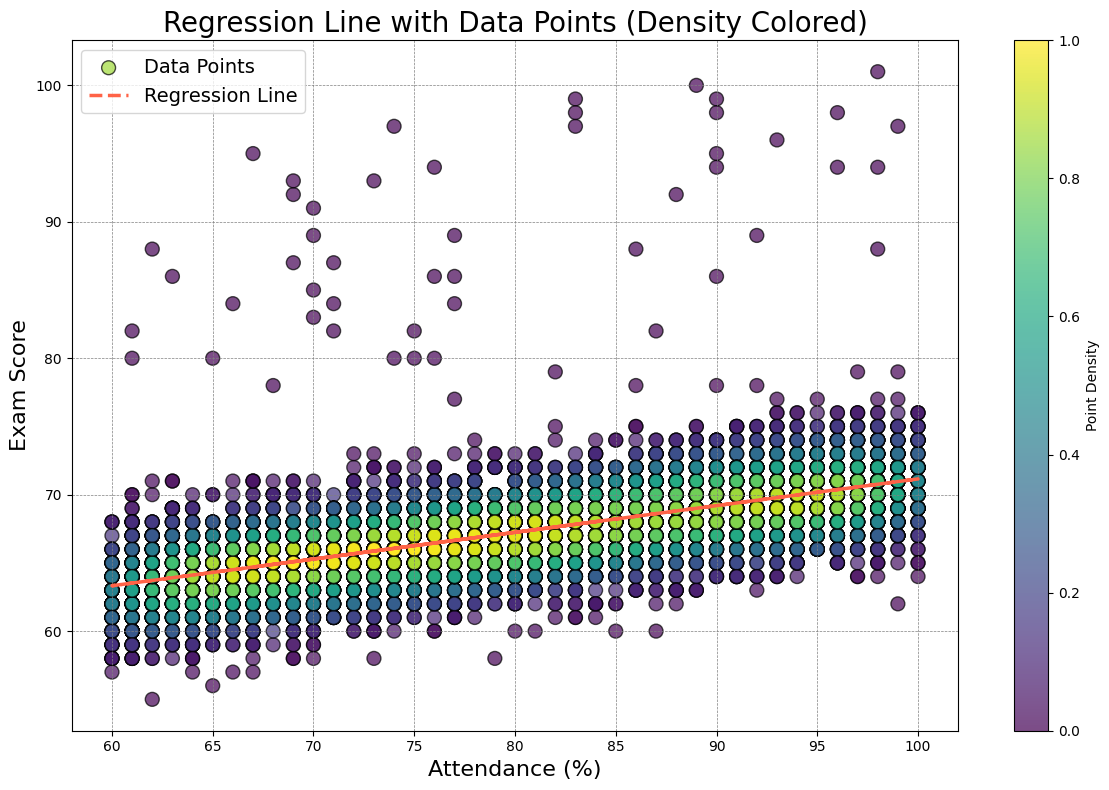

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

# Assuming df is your DataFrame containing 'Attendance' and 'Exam_Score'
X = df[['Attendance']]
y = df['Exam_Score']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate point density using Gaussian KDE
xy = np.vstack([X['Attendance'], y])
z = gaussian_kde(xy)(xy)  # Calculate density

# Normalize the density values for color mapping
z = (z - z.min()) / (z.max() - z.min())  # Normalize to [0, 1]

# Plotting the data points with density-based color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X, y, c=z, s=100, edgecolor='black', alpha=0.7, cmap='viridis', label='Data Points', marker='o')

# Plotting the regression line
plt.plot(X, y_pred, color='tomato', linewidth=2.5, linestyle='--', label='Regression Line')

# Adding labels and title with enhanced aesthetics
plt.xlabel('Attendance (%)', fontsize=16)
plt.ylabel('Exam Score', fontsize=16)
plt.title('Regression Line with Data Points (Density Colored)', fontsize=20)
plt.legend(fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show color bar for density representation
cbar = plt.colorbar(scatter)
cbar.set_label('Point Density')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

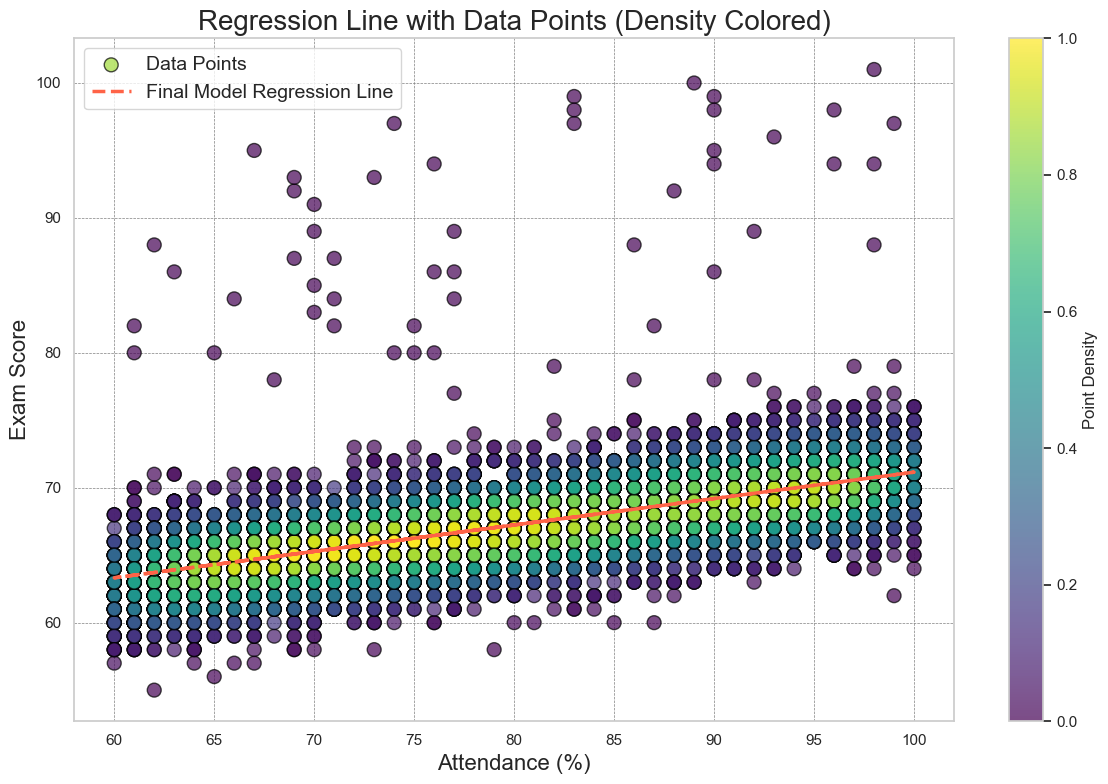

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
from statsmodels.api import OLS, add_constant

# Predict values using the final model
X_final = add_constant(X[selected_features])  # Add constant for OLS prediction
y_pred = final_model.predict(X_final)

# Calculate point density using Gaussian KDE
xy = np.vstack([X['Attendance'], y])
z = gaussian_kde(xy)(xy)  # Calculate density

# Normalize the density values for color mapping
z = (z - z.min()) / (z.max() - z.min())  # Normalize to [0, 1]

# Plotting the data points with density-based color
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X['Attendance'], y, c=z, s=100, edgecolor='black', alpha=0.7, cmap='viridis', label='Data Points', marker='o')

# Plotting the regression line from the final model
plt.plot(X['Attendance'], y_pred, color='tomato', linewidth=2.5, linestyle='--', label='Final Model Regression Line')

# Adding labels and title with enhanced aesthetics
plt.xlabel('Attendance (%)', fontsize=16)
plt.ylabel('Exam Score', fontsize=16)
plt.title('Regression Line with Data Points (Density Colored)', fontsize=20)
plt.legend(fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show color bar for density representation
cbar = plt.colorbar(scatter)
cbar.set_label('Point Density')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### IQR

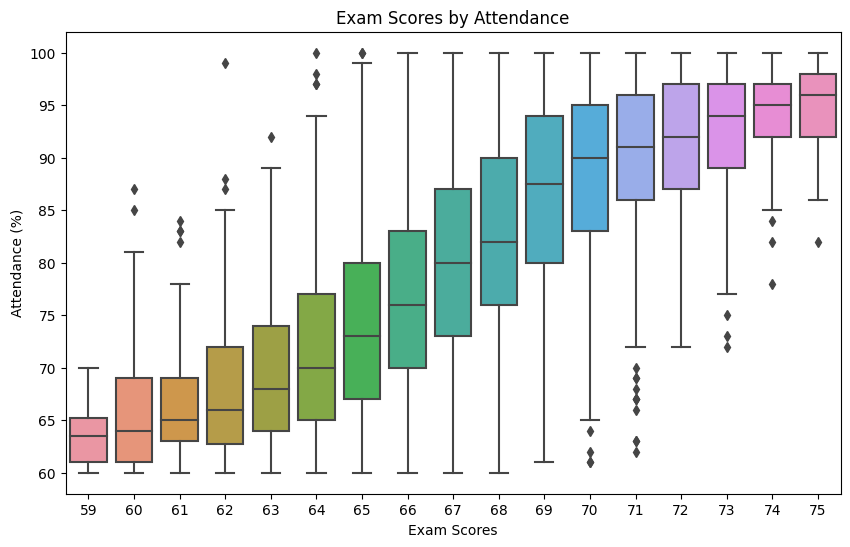

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_df = df[~((df['Exam_Score'] < (Q1 - 1.5 * IQR)) | (df['Exam_Score'] > (Q3 + 1.5 * IQR)))]

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam_Score', y='Attendance', data=filtered_df)
plt.title('Exam Scores by Attendance')
plt.xlabel('Exam Scores')
plt.ylabel('Attendance (%)')
plt.show()


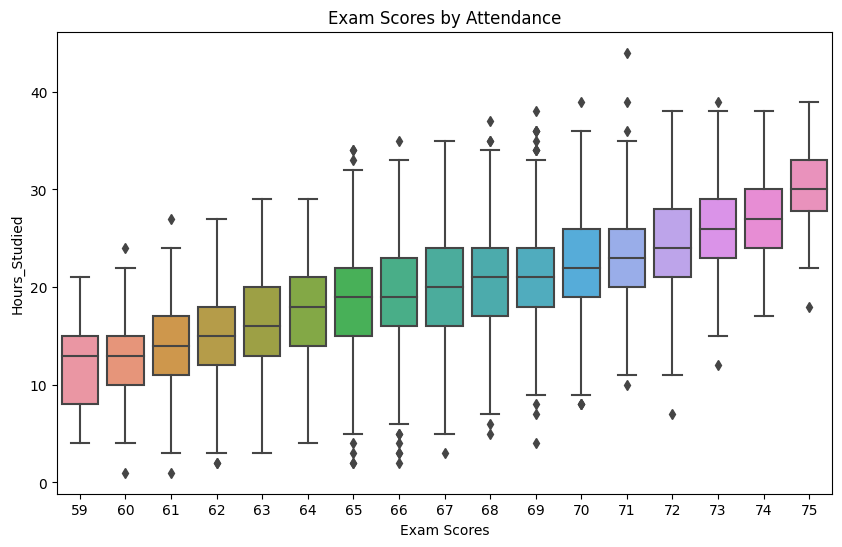

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_df = df[~((df['Exam_Score'] < (Q1 - 1.5 * IQR)) | (df['Exam_Score'] > (Q3 + 1.5 * IQR)))]

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exam_Score', y='Hours_Studied', data=filtered_df)
plt.title('Exam Scores by Attendance')
plt.xlabel('Exam Scores')
plt.ylabel('Hours_Studied')
plt.show()


### Violin Plots

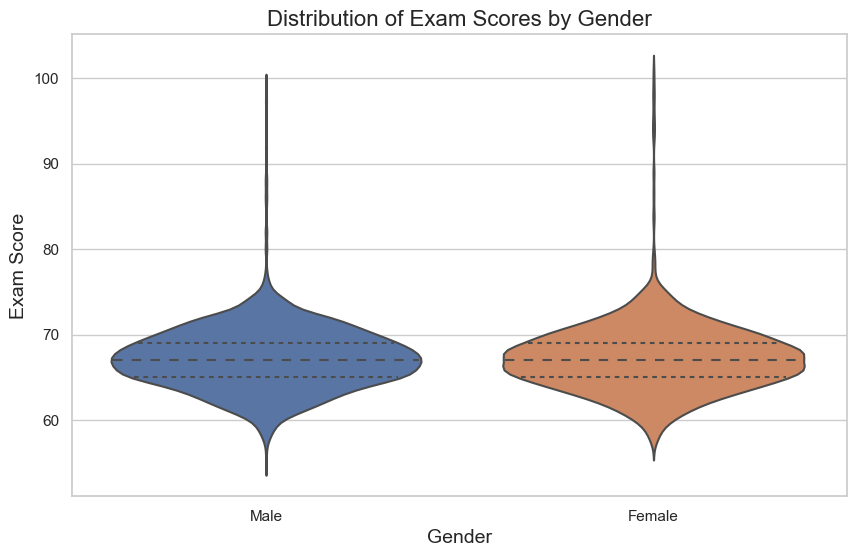

In [17]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('StudentPerformanceFactors.csv')

data.drop_duplicates(inplace=True) # remove the duplicate records

import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Exam_Score', data=data, inner='quartile')

# Add title and labels
plt.title('Distribution of Exam Scores by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)

# Show the plot
plt.show()

### Pairwise Comparisons using Bubble Plot

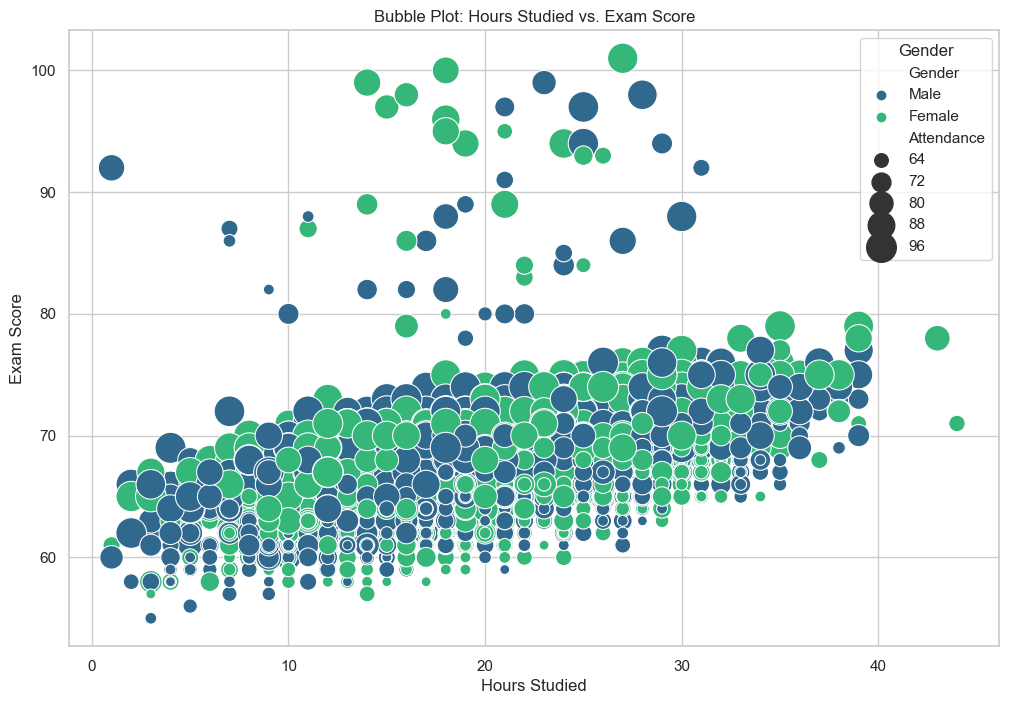

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dfFrame
df = pd.read_csv('StudentPerformanceFactors.csv')

df.drop_duplicates(inplace=True) # remove the duplicate records

for column in df.select_dtypes(include=['object']).columns:

    unique_values = df[column].unique()

    mapping = {value: i for i, value in enumerate(unique_values)}

    df[column] = df[column].map(mapping)
    
# Create a bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(x='Hours_Studied', y='Exam_Score', 
                              size='Attendance', hue='Gender', 
                              palette='viridis', sizes=(50, 500), data=data)
plt.title('Bubble Plot: Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()


### Parallel Coordinates Plot

0    0
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64


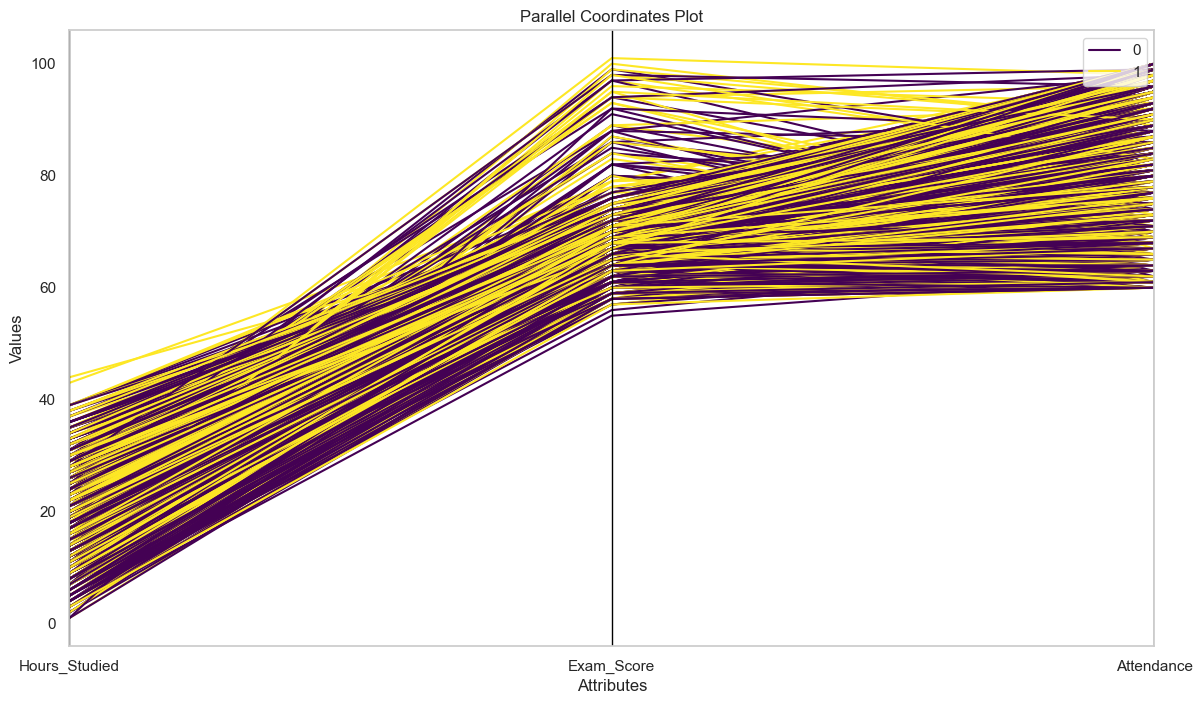

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Assuming df is your dfFrame
df = pd.read_csv('StudentPerformanceFactors.csv')

df.drop_duplicates(inplace=True) # remove the duplicate records

# Map categorical columns including 'Gender'
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

# Check if 'Gender' was successfully mapped
print(df['Gender'].head())
    
# Select numerical columns for the parallel coordinates plot
numerical_cols = ['Hours_Studied', 'Exam_Score', 'Attendance']

# Create a parallel coordinates plot
plt.figure(figsize=(14, 8))
parallel_coordinates(df[numerical_cols + ['Gender']], class_column='Gender', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.show()